In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
plt.style.use('ggplot')
import pandas as pd
import plotly.plotly as plotly
from plotly.graph_objs import *

In [2]:
#  Make notebook and pandas DataFrames look better
from IPython.core.display import HTML
css = open("../styles/style-table.css").read() + open('../styles/style-notebook.css').read()
HTML('<style>{}</style>'.format(css))

In [3]:
from model_def import get_payouts
max_tip = 5
num_tips = 100
curator_perc = 0.4
yours_perc = 0.1
df = get_payouts(max_tip=max_tip, num_tips=num_tips, curator_payout_perc=curator_perc, yours_payout_perc=yours_perc)
df.head()

Total tipped:    $273.54
Yours revenue:   $27.35
Creator revenue: $136.77
Curator revenue: $102.49


,tip,curator_payouts,yours_revenue,curator_num,total_earned
0,4.85757,"[0.185370131101, 0.209079279695, 0.73150522910...",0.485757,0,7.300712
1,0.5123,"[0.0220504181284, 0.0771477507877, 0.040361949...",0.05123,1,0.750415
2,0.647498,"[0.0975073519623, 0.0510136303143, 0.074253506...",0.0647498,2,0.920583
3,3.63323,"[0.28624662668, 0.416649736405, 0.25069873358,...",0.363323,3,4.618426
4,2.36705,"[0.271447066755, 0.163330082617, 0.10772200352...",0.236705,4,2.822412


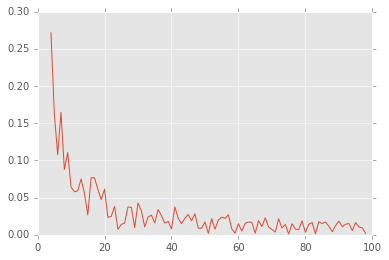

In [40]:
# Plot the payout of a given curator
curator_num = 5
plt.plot(df.curator_num[(curator_num-1):-1], df.curator_payouts[curator_num-1])

In [39]:
sizemode='area'
sizeref = df['total_earned'].max() / 1e2**1.5
labels = []
for exact in df['total_earned']:
    labels.append('${0:.2f}'.format(round(exact,2)))
df['labels'] = labels
df['recouped'] = df.total_earned > df.tip     # for separating Da

colors = dict(
    yes='#ff7f0e',     # color for profiting curator
    no='#2ca02c',      # color for non-profiting curator
)    

# Define a trace-generating function (returns a Scatter object)
def make_trace(X, recouped, sizes, color):
    return Scatter(
        x=X['curator_num'],              # Curator number
        y=X['tip'],                      # Amount of initial tip
        text=X['labels'],                      # label on hover
        mode='markers',                   # (!) point markers only on this plot
        name=recouped,
        marker= Marker(       
            size=sizes,          # (!) marker sizes (sizes is a list)
            color=color,
            sizeref=sizeref,              # link sizeref
            sizemode=sizemode,            # link sizemode
            opacity=0.5,                  # (!) partly transparent markers
            line=Line(width=0.0)          # remove marker borders
        )
    )

data = Data()
for recouped, X in df.groupby('recouped'):

    sizes = X['total_earned']                  # get population array 
    if recouped:                               # get bubble color
        color=colors['yes']
        recouped = 'Profited'
    else:
        color=colors['no']
        recouped = "Didn't profit"

    data.append(
        make_trace(X, recouped, sizes, color)  # append trace to data object
    )


# Set plot and axis titles
title = "Projected Yours Network Payout"
x_title = "Curator Number"
y_title = "Amount Tipped, (USD)"

# Define a dictionary of axis style options
axis_style = dict(
    zeroline=False,       # remove thick zero line
    gridcolor='#FFFFFF',  # white grid lines
    ticks='outside',      # draw ticks outside axes 
    ticklen=8,            # tick length
    tickwidth=1.5,        #   and width
)

# Make layout object
layout = Layout(
    title=title,             # set plot title
    plot_bgcolor='#EFECEA',  # set plot color to grey
    hovermode='closest',     # set hover to show closest to cursor
    xaxis=XAxis(
        axis_style,      # add axis style dictionary
        title=x_title,   # x-axis title
    ),
    yaxis=YAxis(
        axis_style,      # add axis style dictionary
        title=y_title,   # y-axis title
    ),
    showlegend=False,     # remove legend (info in hover)
    autosize=False,       # turn off autosize
)

# Make Figure object
fig = Figure(data=data, layout=layout)

# (@) Send to Plotly and show in notebook
plotly.iplot(fig, filename='paymentModel')
